# Introduction to neural network classification with tensorflow

Types of *Classification* that would be discussed are;
- Binary Classification
- Multiclass Classification
- Multilabel Classification

# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples

n_sample = 1000

# Create circles
X, y = make_circles(n_sample,
                    noise = 0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10], len(y)

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]), 1000)

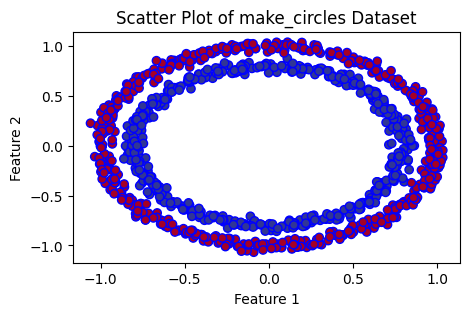

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='b')
plt.title('Scatter Plot of make_circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:, 1], "labels": y })
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_train, X_test = X[:700], X[700:]
y_train, y_test = y[:700], y[700:]
X_test.shape, y_test.shape

((300, 2), (300,))

In [ ]:
import tensorflow as tf


In [ ]:
# Create a model for our binary classification dataset
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # the last layer is the output layer and it has a single unit because it's a binary classification problem.
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics =["accuracy"])

# Fit the model
history = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5022 - loss: 0.6867
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5412 - loss: 0.6819
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5192 - loss: 0.6805
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5556 - loss: 0.6696 
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5611 - loss: 0.6651  
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5476 - loss: 0.6636 
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5855 - loss: 0.6450 
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.6366 
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5840 - loss: 0.6276  
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7100 - loss: 0.5930 
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7350 - loss: 0.5781  
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [ ]:
model_1.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0183  


[0.022057605907320976, 1.0]

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary for a classification model.

    Arguments:
    model -- a trained model (must have a predict method)
    X -- input features (numpy array)
    y -- true labels (numpy array)
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Get model predictions for each point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='b')
    plt.title('Decision Boundary')
    plt.show()


5228/5228 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


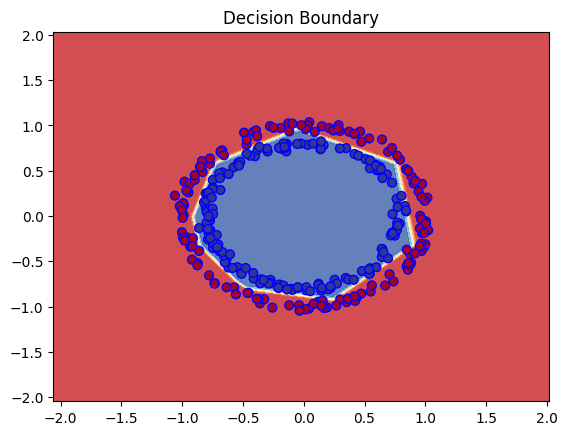

In [ ]:
plot_decision_boundary(model_1, X_test, y_test)

### Creating a Neural Network Classification Model for a Real life problem with real data
> I'm going to use the `Fashion mnist dataset` as my data for the model to train on.

> **🔑**: This is a multi-class classification problem

- *Let's Goooooo*

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.datasets import fashion_mnist



In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
fash = tfds.load('fashion_mnist')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.ZWFSZQ_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.ZWFSZQ_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
tr_data, te_data = fash['train'], fash['test']


In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

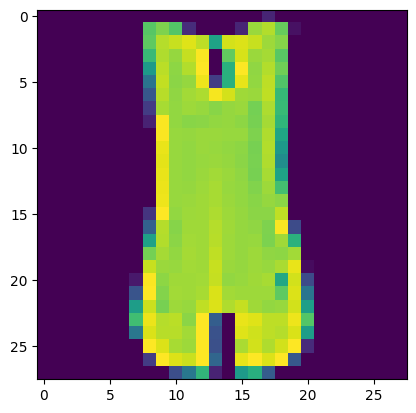

In [ ]:
# Plot an example to see how it looks
import matplotlib.pyplot as plt
plt.imshow(train_data[4]);

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len (class_names)

10

Text(0.5, 1.0, 'Shirt')

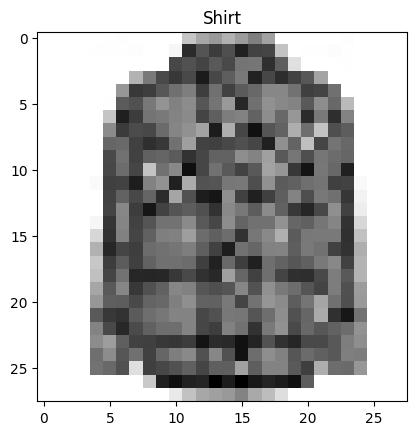

In [ ]:
# Plotting an image with it's label
index = 32
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# we can normalise our data for better training performance of our model
train_data_norm = train_data/ 255.0
test_data_norm = test_data/ 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Building our neural network classification model

#Set random seed
tf.random.set_seed(42)

#Build the model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history = model_7.fit(train_data_norm, train_labels, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4517 - loss: 1.5702
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7536 - loss: 0.7303
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7889 - loss: 0.6155
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8052 - loss: 0.5680
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8102 - loss: 0.5429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8158 - loss: 0.5277
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8194 - loss: 0.5183
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8230 - loss: 0.5108
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8244 - loss: 0.5052
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8259 - loss: 0.5006
